<a href="https://colab.research.google.com/github/groneperrosato/test/blob/main/pca_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook we are going to test [PCA (Principal Component Analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its applicattions in data science. PCA is a popular method for reducing the number of variables in a dataset while retaining most of its original information. It is commonly used for visualizing high-dimensional data and removing noise from a dataset.

Specifically, in this notebook, we will use the famous [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) to demonstrate how PCA can help us achieve these goals. By the end of this notebook, you will have a good understanding of how to implement PCA in Python and how to interpret its results.

# Applying PCA

In [ ]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
# load the data

data = load_iris()

# see the keys 

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# create the dataset

iris = pd.concat(
          [pd.DataFrame(data = data.data, columns = data.feature_names),
           pd.DataFrame(data = data.target, columns = ["target"])], axis = 1
)

# create the dataset with the name of the class

iris_names = iris

iris_names["target"] = iris_names["target"].replace([0,1,2], data.target_names)

In [ ]:
# see the info

iris_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# a numerical description of our dataset

iris_names.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that the iris_names dataset consists of 150 rows and 5 columns, where each column represents an attribute of the samples and the last column represents the class label.

The iris dataset is the same except the column target is numerical instead of categorical.

We need to keep in mind that, as we can see from the cell above, the data may not be measured in the same units or have the same scales, and the PCA method is to sensible to this difference. So, before appliying PCA is needed to apply a scaler to standarize the features. Therefore, it is recommended to standarize the features before using [StandarScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

We use this escaler as a preprocessing step before using PCA because it is very sensible to variance, and this escaler standardizes the data by centering it around a mean of 0 and scaling it to have a variance of 1.

In [ ]:
# import the scaler

from sklearn.preprocessing import StandardScaler

# use the scaler

scaler = StandardScaler()
esc_data = scaler.fit_transform(data.data)

# create the new dataset

esc_iris_names = pd.concat(
    [pd.DataFrame(esc_data, columns = data.feature_names),
     iris_names["target"]], axis = 1
)

In [ ]:
# import PCA

from sklearn.decomposition import PCA

# apply PCA to the standarized dataset

pca = PCA(n_components = 2)

pca_data = pca.fit_transform(esc_iris_names.drop(["target"], axis = 1))

pca_iris = pd.concat([pd.DataFrame(data = pca_data, columns = ["component 1", "component 2"]), 
                      iris_names["target"]], axis = 1)

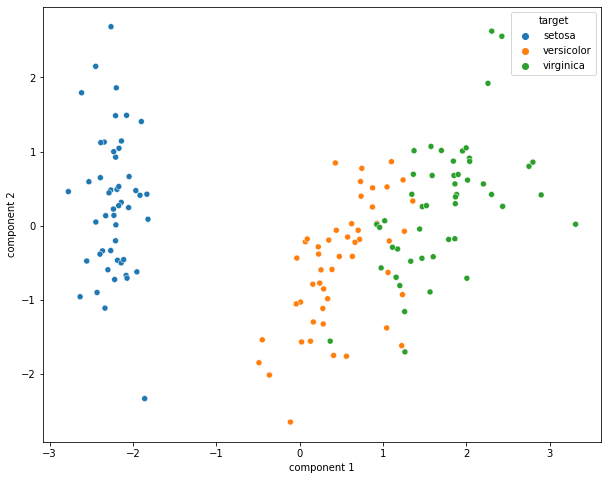

In [ ]:
# represent the principal components

import seaborn as sns

plt.figure(figsize = (10,8))
sns.scatterplot(data = pca_iris, 
                x = "component 1", 
                y = "component 2", 
                hue = "target")
plt.show()

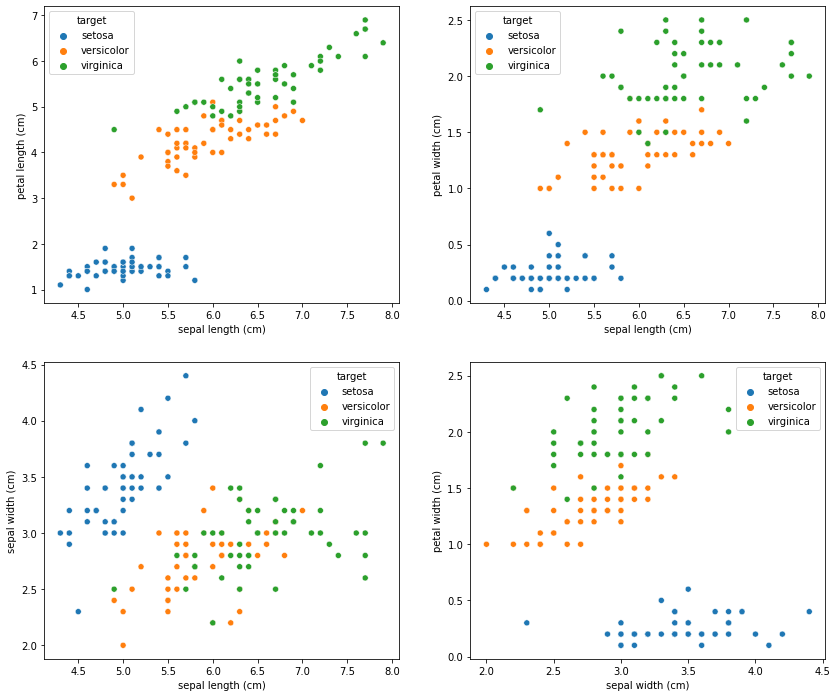

In [ ]:
# represent a combinations of the originals features

fig, axs = plt.subplots(2, 2, figsize = (14,12))

sns.scatterplot(data = iris_names, 
                x = "sepal length (cm)", 
                y = "petal length (cm)", 
                hue = "target", 
                ax = axs[0,0])

sns.scatterplot(data = iris_names, 
                x = "sepal length (cm)", 
                y = "sepal width (cm)", 
                hue = "target", 
                ax = axs[1,0])

sns.scatterplot(data = iris_names, 
                x = "sepal length (cm)", 
                y = "petal width (cm)", 
                hue = "target", 
                ax = axs[0,1])

sns.scatterplot(data = iris_names, 
                x = "sepal width (cm)", 
                y = "petal width (cm)", 
                hue = "target", 
                ax = axs[1,1])
plt.show()

As we can see, there are not significant differences in the performance of our models when representing them using the two main components of PCA or a combination of two features. This allows us to effectively represent our complete model in a two-dimensional graphic. 

However, it is important to assess how this affects the training of some models, such as the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), which we will examine next.


In [ ]:
# import the necessary libraries to split the data, train the model and get the metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# get our features and target from the original model

x_ori = data.data
y_ori = data.target

# split our data

x_ori_train, x_ori_test, y_ori_train, y_ori_test = train_test_split(x_ori, y_ori, random_state = 21, test_size = 0.25)

# get our features and target from the standarized model

x_sta = pca_iris.drop(["target"], axis = 1)
y_sta = data.target

# split our data

x_sta_train, x_sta_test, y_sta_train, y_sta_test = train_test_split(x_sta, y_sta, random_state = 41, test_size = 0.25)


In [ ]:
# train the original model

rf_ori = RandomForestClassifier(n_estimators = 200,
                                max_depth = 3,
                                random_state = 29)

rf_ori.fit(x_ori_train, y_ori_train)

# get the predictions

pred_ori = rf_ori.predict(x_ori_test)

# see the confusion matrix and the accuracy 

print("The resultant confusion matrix is: \n", confusion_matrix(y_ori_test, pred_ori))
print("\nAnd the accuracy: ", accuracy_score(y_ori_test, pred_ori))

The resultant confusion matrix is: 
 [[13  0  0]
 [ 0 12  3]
 [ 0  0 10]]

And the accuracy:  0.9210526315789473


In [ ]:
# train the standarized model

rf_sta = RandomForestClassifier(n_estimators = 200,
                                max_depth = 3,
                                random_state = 4)

rf_sta.fit(x_sta_train, y_sta_train)

# get the predictions

pred_sta = rf_sta.predict(x_sta_test)

# see the confusion matrix and the accuracy 

print("The resultant confusion matrix is: \n", confusion_matrix(y_sta_test, pred_sta))
print("\nAnd the accuracy: ", accuracy_score(y_sta_test, pred_sta))

The resultant confusion matrix is: 
 [[10  0  0]
 [ 0 15  0]
 [ 0  4  9]]

And the accuracy:  0.8947368421052632


We can see that the accuracy of our models is not significantly different, which leads us to consider whether it may be worthwhile to use the two-component model instead.

# Conclusion

In conclusion, the PCA method is a powerful tool that can be used to reduce the dimensionality of a model, eliminate noise and outliers, and represent the model in a two-dimensional graph. While there are many benefits to using PCA, such as pre-processing data for use in other models and reducing training time, it's important to note that this method requires a wide knowledge of the problem's casuistic and how the model works.

In any case, as data scientists, it's important to be familiar with a variety of approaches to problem-solving in order to choose the best method for each situation.